In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape) 

11493376/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [6]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test,10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [7]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
__________________________________________________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2275 - accuracy: 0.9333
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0829 - accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0528 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0281 - accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0208 - accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0124 - accura

In [9]:
score = model.evaluate(X_test, Y_test)
print('Test score:',score[0])
print('Test accuracy:',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9802
Test score: 0.08298113197088242
Test accuracy: 0.9801999926567078


In [10]:
predicted_classes = np.argmax(model.predict(X_test),axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


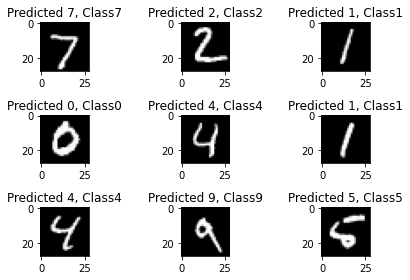

In [14]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray')
  plt.title("Predicted {}, Class{}".format(predicted_classes[correct],y_test[correct]))
plt.tight_layout()

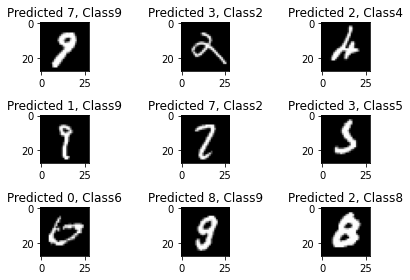

In [15]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
  plt.title("Predicted {}, Class{}".format(predicted_classes[incorrect],y_test[incorrect]))
plt.tight_layout()